# __NBA Data Exploration__

### by __Marcio Ribeiro__

## Preliminary Wrangling

This document explore statistics of NBA in last 30 years

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.patches import ConnectionPatch
from matplotlib.font_manager import FontProperties
sns.set(rc={'figure.figsize':(30,5)})
sns.set_style("whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#import os
#os.environ['PROJ_LIB'] = '/opt/conda/lib/python3.7/site-packages/mpl_toolkits/basemap'

import geopandas
import geoplot
import mapclassify
from descartes import PolygonPatch


world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)

In [2]:
seasons_df = pd.read_csv('seasons_clean.csv', encoding='utf-8-sig')

In [3]:
seasons_df.shape

(17113, 42)

In [4]:
seasons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17113 entries, 0 to 17112
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              17113 non-null  object 
 1   url               17113 non-null  object 
 2   height            17113 non-null  float64
 3   weight            17113 non-null  int64  
 4   shoots            17113 non-null  object 
 5   country           17113 non-null  object 
 6   pos               17113 non-null  object 
 7   age               17113 non-null  int64  
 8   team_id           17113 non-null  object 
 9   g                 17113 non-null  int64  
 10  gs                17113 non-null  int64  
 11  mp                17113 non-null  int64  
 12  fg                17113 non-null  int64  
 13  fga               17113 non-null  int64  
 14  fg3               17113 non-null  int64  
 15  fg3a              17113 non-null  int64  
 16  fg2               17113 non-null  int64 

In [5]:
seasons_df.describe()

,height,weight,age,g,gs,mp,fg,fga,fg3,fg3a,...,pf,pts,season,fg_pct,fg3_pct,fg2_pct,ft_pct,efg,pts_g,height_m
count,17113.000000,17113.000000,17113.00000,17113.000000,17113.000000,17113.000000,17113.000000,17113.000000,17113.000000,17113.000000,...,17113.000000,17113.000000,17113.000000,17113.000000,17113.000000,17113.000000,17113.000000,17113.000000,17113.000000,17113.000000
mean,6.492897,217.474084,26.86893,47.499795,22.622451,1107.694501,172.011862,378.112371,28.435517,80.396541,...,99.257348,457.685035,2005.931514,0.431457,0.227364,0.455552,0.689469,0.465730,7.882453,2.003212
std,0.386216,27.542382,4.15474,26.470449,27.932164,903.795995,170.713444,363.727564,43.313561,114.924706,...,75.869214,459.996682,8.894523,0.105663,0.184159,0.114529,0.210625,0.110189,5.870288,0.093630
min,5.100000,133.000000,18.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000
25%,6.110000,195.000000,24.00000,24.000000,0.000000,281.000000,32.000000,78.000000,0.000000,2.000000,...,31.000000,84.000000,1998.000000,0.395604,0.000000,0.420455,0.636364,0.433333,3.333333,1.930000
50%,6.500000,218.000000,26.00000,51.000000,7.000000,918.000000,118.000000,268.000000,6.000000,22.000000,...,89.000000,311.000000,2006.000000,0.437500,0.284091,0.466667,0.742268,0.478654,6.343750,2.010000
75%,6.800000,237.000000,30.00000,73.000000,42.000000,1796.000000,265.000000,586.000000,42.000000,122.000000,...,155.000000,704.000000,2014.000000,0.480797,0.360731,0.506229,0.813084,0.516129,11.243902,2.080000
max,7.700000,360.000000,44.00000,85.000000,83.000000,3533.000000,1034.000000,2173.000000,402.000000,1028.000000,...,371.000000,2832.000000,2020.000000,1.000000,1.000000,1.000000,1.000000,1.500000,36.128205,2.310000


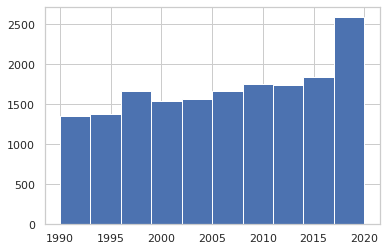

In [6]:
seasons_df.season.hist();

In [7]:
%%html
<style>
table {float:left}
</style>

### What is the structure of your dataset?

There are information for last 30 seasons of NBA, which these fields:


__Column Description__

| Column | Description |
| :-- | :-- |
| Name | Name of Player |
| url | URL for player profile |
| height | Height in ft |
| weight | Weight in pounds  |
| shoots | Player is left-handed, right-handed or both |
| country | Code for player nationatity |
| pos  | position |
| age | age |
| team_id  | team  |
| g | games |
| gs | games started |
| mp | minutes played |
| fg  | field goals |
| fga  | field goals attempts |
| fg3  | 3-point field goals |
| fg3a  | 3-point field goals attempts  |
| fg2 | 2-point field goals |
| fg2a | 2-point field goals attempts |
| ft | free-throw |
| fta  | free-throw attempts |
| orb  | offensive rebound |
| drb  | defensive rebound |
| ast  | assists |
| stl  | steals  |
| blk  | blocks |
| tov |  turnovers |
| pf  | personal fouls |
| pts | points |
| season | season |
|fg_pct| Field Goal Percent|
|fg3_pct|3-Point Field Goal Percent |
|fg2_pct|2-Point Field Goal Percent |
|ft_pct| Free-Throw Percent |
|efg| Effective Field Goal Percent |
|pts_g | Points per Game |
|country_name| Country Name |
|country_flag_url| URL For Country Flag |
|height_m | Height in meters |
|american | If player is american  |

### What is/are the main feature(s) of interest in your dataset?

<span style="color:navy;font-weight:bold">My goal is to analyze some aspects about how a NBA game has changed in last 30 years.<span>

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

<span style="color:navy;font-weight:bold">As NBA fan, my feeling is that players are shooting more 3-Points today than they were 30 years ago. I want to confirm the relevance of 3-Points hit in NBA today<br>
    I also want to evaluate the importance of globalization in NBA today.</span>

## Univariate Exploration


<span style="color:navy;font-weight:bold">I´ll start by looking the number of points per season</span>

In [8]:
pps = seasons_df.groupby(['season'], as_index=False)['pts'].sum()
pps.sort_values(['season'],inplace=True)

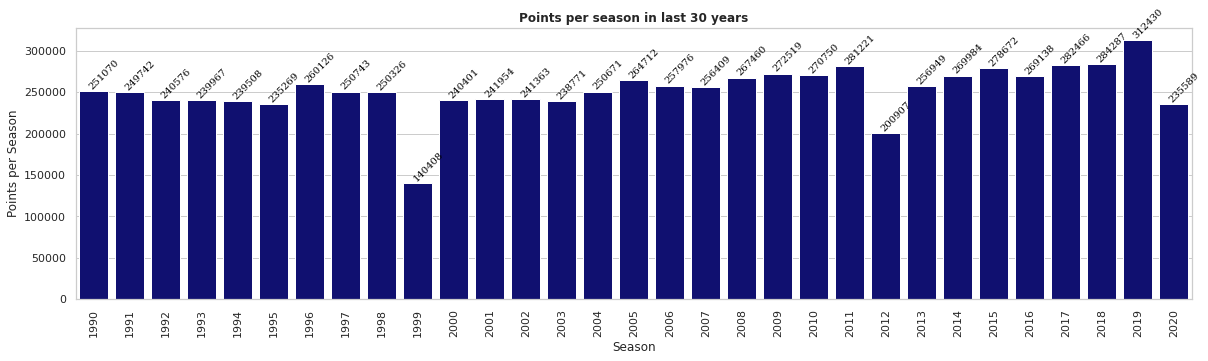

In [9]:
fig, ax = plt.subplots()
ax = sns.barplot(x="season", y="pts", data=pps, color='navy')
ax.set(ylabel='Points per Season', xlabel='Season')
ax.set_title('Points per season in last 30 years', fontsize='large', fontweight='bold')
plt.xticks(rotation=90)
fig.set_size_inches(20, 5)

font = FontProperties()
font.set_family('serif')
font.set_size(10)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.7, p.get_height()),
                    ha='center', va='bottom',  fontproperties=font,
                    color= 'black', rotation=45)
        
plt.show();



<span style="color:navy;font-weight:bold">I can see an increase in number of points per game. Comparing 251070 points in season 1990 to 312430 points in season 2019, is an increase of 24.4% in number of points. This might indicate the game is faster now that it was 30 years ago. <br>
I´ll check if average of points per game per player has increased over the year</span>

In [10]:
ppgs = seasons_df.groupby(['season'], as_index=False)['pts_g'].mean()
ppgs.sort_values(['season'],inplace=True)

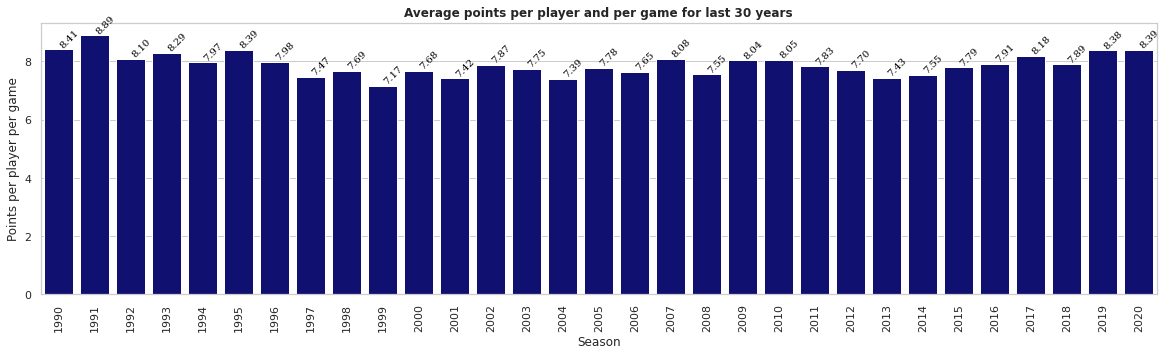

In [11]:
fig, ax = plt.subplots()
ax = sns.barplot(x="season", y="pts_g", data=ppgs, color='navy')
ax.set(ylabel='Points per player per game', xlabel='Season')
ax.set_title('Average points per player and per game for last 30 years', fontsize='large', fontweight='bold')
plt.xticks(rotation=90)
fig.set_size_inches(20, 5)

font = FontProperties()
font.set_family('serif')
font.set_size(10)

for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.7, p.get_height()),
                    ha='center', va='bottom',  fontproperties=font,
                    color= 'black', rotation=45)
        
plt.show();



<span style="color:navy;font-weight:bold">Even though the number of points per season has increased in the period, I cannot see same behaviour in average points per player per game. This probably means that more players are scoring points in current NBA.<br>
Now I want to investigate field goals attempts per season.</span>

In [12]:
fga = seasons_df.groupby(['season'],as_index=False)['fga'].mean()
fga.sort_values(['season'],inplace=True)

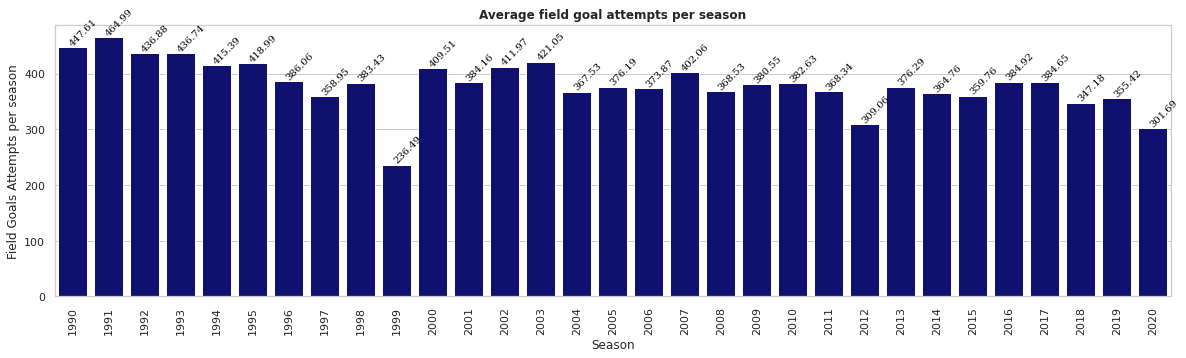

In [13]:
fig, ax = plt.subplots()
ax = sns.barplot(x="season", y="fga", data=fga, color='navy')
ax.set(ylabel='Field Goals Attempts per season', xlabel='Season')
ax.set_title('Average field goal attempts per season', fontsize='large', fontweight='bold')
plt.xticks(rotation=90)
fig.set_size_inches(20, 5)

font = FontProperties()
font.set_family('serif')
font.set_size(10)

for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.7, p.get_height()),
                    ha='center', va='bottom',  fontproperties=font,
                    color= 'black', rotation=45)
        
plt.show();



<span style="color:navy;font-weight:bold">Surprise ! The number of points per season increased in last 30 years. However I´ve noticed a decreasing in Field Goals attempts over the year. <br>
This might indicate that percentage that hit percentage has increased in the period or it might indicate that the number of 3-Point FG has increased. <br>
I want to investigate the average FG percentage per season</span>

In [14]:
fg_pct = seasons_df.groupby(['season'],as_index=False)['fg_pct'].mean()
fg_pct.sort_values(['season'],inplace=True)

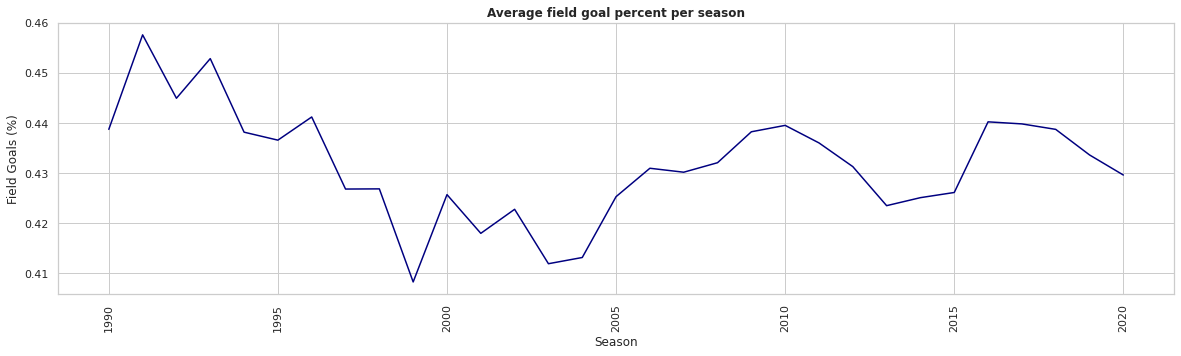

In [15]:
fig, ax = plt.subplots()
ax = sns.lineplot(x="season", y="fg_pct", data=fg_pct, color='navy')
ax.set(ylabel='Field Goals (%)', xlabel='Season')
ax.set_title('Average field goal percent per season', fontsize='large', fontweight='bold')
plt.xticks(rotation=90)
fig.set_size_inches(20, 5)

font = FontProperties()
font.set_family('serif')
font.set_size(10)

for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.7, p.get_height()),
                    ha='center', va='bottom',  fontproperties=font,
                    color= 'black', rotation=45)
        
plt.show();



<span style="color:navy;font-weight:bold">I don´t see an increase in the average of FG percent. <br>
    So we have an increase in number of points, decrease in number of FG attempts, and small variation in FG percents. <br>
    This probably can be explaining by players shooting more 3-Points FG today than 30 years ago.</span>

<span style="color:navy;font-weight:bold">Now I´ll investigate player height and weight distribution</span>

In [16]:
players = seasons_df[['name', 'height_m', 'weight' , 'shoots', 'country_name', 'country_alpha3', 'american']]
players.drop_duplicates(inplace=True)


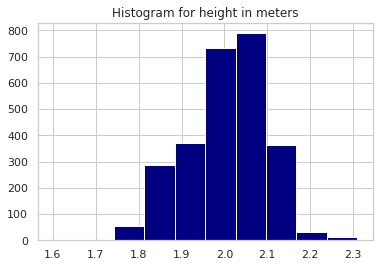

In [17]:
fig, ax = plt.subplots()
ax = plt.hist(x="height_m", data=players, color='navy')
plt.title('Histogram for height in meters')
plt.show();



In [18]:
height_m = seasons_df.groupby(['season'],as_index=False)['height_m'].mean()
height_m.sort_values(['season'],inplace=True)

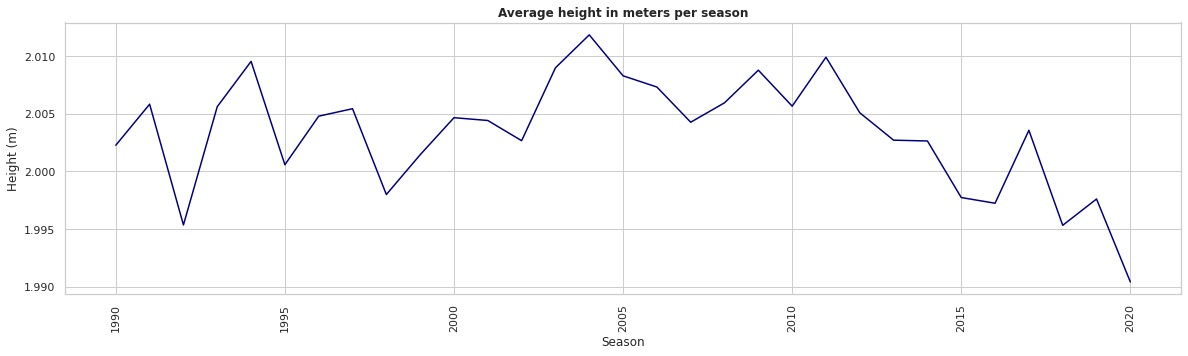

In [19]:
fig, ax = plt.subplots()
ax = sns.lineplot(x="season", y="height_m", data=height_m, color='navy')
ax.set(ylabel='Height (m)', xlabel='Season')
ax.set_title('Average height in meters per season', fontsize='large', fontweight='bold')
plt.xticks(rotation=90)
fig.set_size_inches(20, 5)

font = FontProperties()
font.set_family('serif')
font.set_size(10)

for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.7, p.get_height()),
                    ha='center', va='bottom',  fontproperties=font,
                    color= 'black', rotation=45)
        
plt.show();



<span style="color:navy;font-weight:bold">Average height is decreasing over the year. This can be explained by teams replacing traditional centers by modern beyond-the-perimeter game<span>

In [20]:
players.sort_values(['height_m'],ascending=True).head(1)

,name,height_m,weight,shoots,country_name,country_alpha3,american
30,Muggsy Bogues,1.6,136,Right,United States of America,USA,Yes


In [21]:
players.sort_values(['height_m', 'weight'],ascending=False).head(1)

,name,height_m,weight,shoots,country_name,country_alpha3,american
2120,Gheorghe Mureșan,2.31,303,Right,Romania,ROU,No


<span style="color:navy;font-weight:bold">Tyrone Curtis "Muggsy" Bogues is the smallest player in NBA in last 30 years with 1.6m height and  Gheorghe Mureșan is the tallest with 2.31m. You can check their biography in following links:
</span>
    
<a href="https://en.wikipedia.org/wiki/Muggsy_Bogues">Muggsy_Bogues</a>
<br>
<a href="https://en.wikipedia.org/wiki/Gheorghe_Mure%C8%99an">Gheorghe Muresan</a>

In [22]:
weight = seasons_df.groupby(['season'],as_index=False)['weight'].mean()
weight.sort_values(['season'],inplace=True)

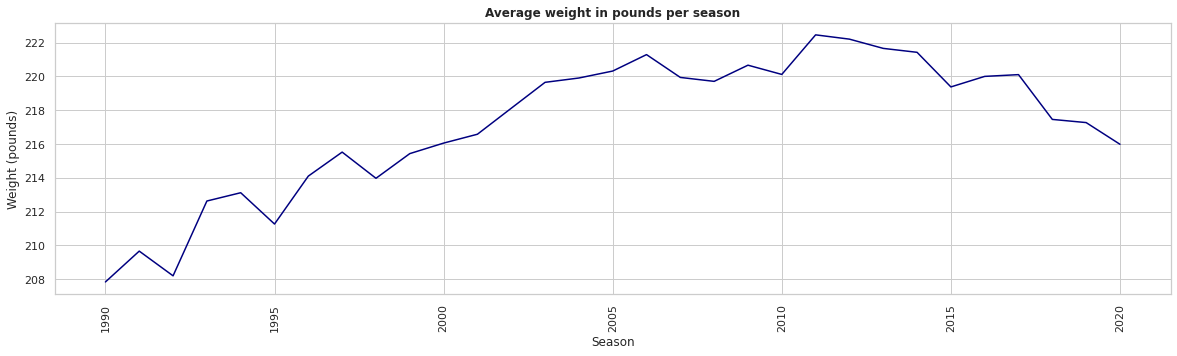

In [23]:
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.lineplot(x="season", y="weight", data=weight, color='navy')
ax.set(ylabel='Weight (pounds)', xlabel='Season')
ax.set_title('Average weight in pounds per season', fontsize='large', fontweight='bold')
plt.xticks(rotation=90)
fig.set_size_inches(20, 5)

font = FontProperties()
font.set_family('serif')
font.set_size(10)

for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.7, p.get_height()),
                    ha='center', va='bottom',  fontproperties=font,
                    color= 'black', rotation=45)
        
plt.show();



<span style="color:navy;font-weight:bold">Even though the average is decreasing in last decade, we noticed that players today are heavier than 30 years ago.</span>

<span style="color:navy;font-weight:bold">Now I´ll investigate the distribution by shooting hand</span>

In [24]:
players['hand'] = players.apply(lambda x: 'Right-Handed' if x['shoots'] == 'Right' else 'Left-Handed',axis=1)
shoots = players.groupby(['hand'],as_index=False)['name'].count()
shoots.columns = ['hand', 'total']

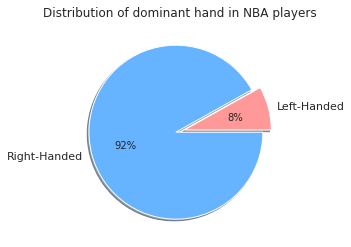

In [25]:
labels = shoots['hand']
values = shoots['total']
fig, ax = plt.subplots()

colors = ['#ff9999','#66b3ff']

explode = (0.05,0.05)

ax = plt.pie(values, labels=labels, explode=explode, colors=colors, autopct='%0.f%%',shadow=True)

plt.title('Distribution of dominant hand in NBA players')

        
plt.show();



In [26]:
seasons_df[seasons_df.shoots == 'Left Right']['name'].unique()

array(['Tristan Thompson'], dtype=object)

<span style="color:navy;font-weight:bold">Right-handed players are the majority in NBA with 92%. As an interesting fact, there is only 1 player reported as ambidextrous in last 30 years: Tristan Thompson. You can check his biography in below link <br>
</span>

<a href="https://en.wikipedia.org/wiki/Tristan_Thompson">Tristan Thompson</a>

<span style="color:navy;font-weight:bold">Finally I want to analyze NBA globalization.</span>

In [27]:
len(seasons_df.country_code.unique())

83

In [28]:
players_season = seasons_df[['season', 'name', 'american']]
players_season.drop_duplicates(inplace=True)
players_season = players_season.groupby(['season', 'american'],as_index=False)['name'].count()
players_season.rename(columns={'name':'total'},inplace=True)
players_season.sort_values(['season', 'american'], inplace=True)

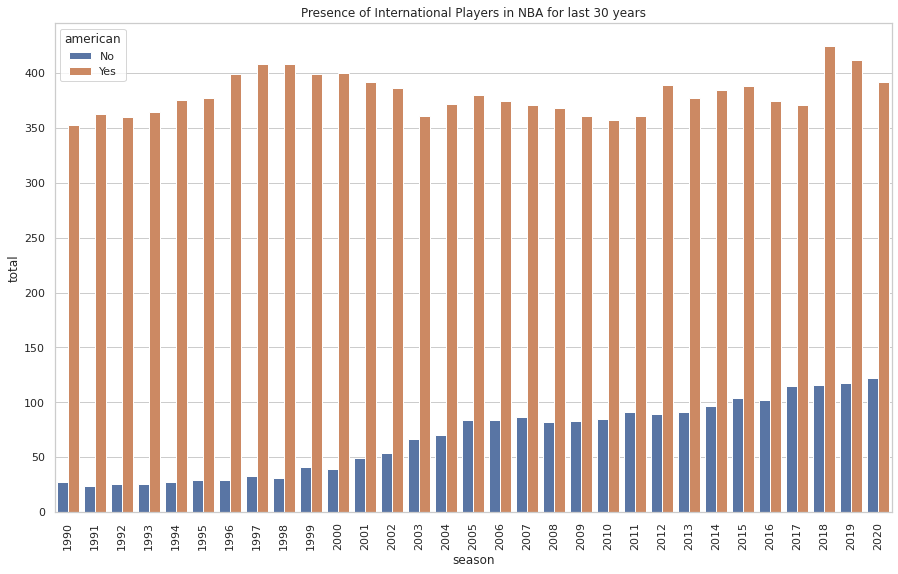

In [29]:
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.barplot(x="season", y="total", hue="american", data=players_season)
plt.xticks(rotation=90)
ax.set_title('Presence of International Players in NBA for last 30 years')
plt.show();



In [30]:
players_season = players_season.pivot(index='season', columns='american', values='total')
players_season.reset_index(inplace=True)
players_season.rename(columns={'No': 'International', 'Yes': 'American'}, inplace=True)

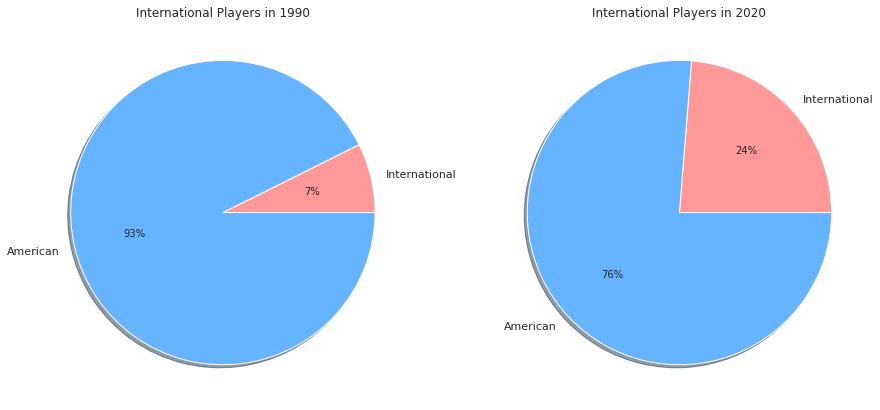

In [31]:
fig, ax = plt.subplots(1,2,figsize=(15,9))
labels = ['International', 'American']
values_90 = list(players_season.query('season == 1990').iloc[0, 1:3])
values_20 = list(players_season.query('season == 2020').iloc[0, 1:3])

colors = ['#ff9999','#66b3ff']

ax[0].pie(values_90, labels=labels, colors=colors, autopct='%0.f%%',shadow=True)
ax[1].pie(values_20, labels=labels, colors=colors, autopct='%0.f%%',shadow=True)

ax[0].set_title('International Players in 1990')
ax[1].set_title('International Players in 2020')
        
plt.show();



<span style="color:navy;font-weight:bold">I can see the number of international players dramatically increased in last 30 years. <br>
</span>

In [32]:
countries = players.groupby(['country_name', 'country_alpha3'],as_index=False)['name'].count()
countries.columns = ['country', 'country_alpha3', 'total']
countries.sort_values(['total'],ascending=False,inplace=True)
countries.at[countries[countries['country'] == 'French Guiana'].index, 'country_alpha3'] = 'GUY'
countries.at[countries[countries['country'] == 'Guadeloupe'].index, ['country','country_alpha3']] = ['France','FRA']
countries.at[countries[countries['country'] == 'Martinique'].index, ['country','country_alpha3']] = ['France','FRA']
countries_sum = countries.groupby(['country', 'country_alpha3'],as_index=False)['total'].sum()
countries_gdf = geopandas.read_file("countries.geojson", layer='countries')



### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

<span style="color:navy;font-weight:bold">The numbers confirmed my feelings as NBA today. The number of 3-Points hit increased dramatically in last 30 years. Also, we noticed that players are a little shorter and strong today than how they were 30 years ago</span>

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

<span style="color:navy;font-weight:bold">The data was consolidated per seasons. However, same player can play many seasons. So, for analysis of individual characteristics, I had to summarize the data per player</span>

## Bivariate Exploration



<span style="color:navy;font-weight:bold">I'll start checking the correlation between age and points per game</span>

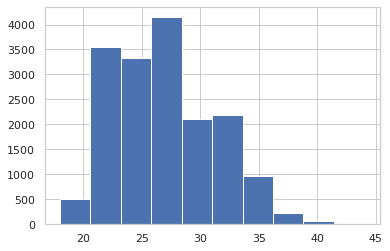

In [33]:
seasons_df.age.hist(bins=10);

In [34]:
age_pts = seasons_df.groupby(['age'],as_index=False)['pts'].mean()


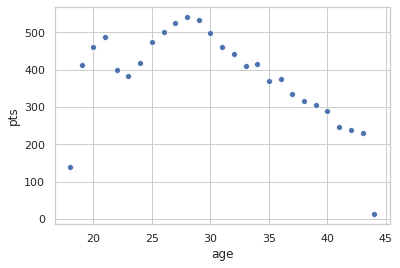

In [35]:
ax = sns.scatterplot(x="age", y="pts", data=age_pts)

<span style="color:navy;font-weight:bold">Now correlation between age and field goal attempts</span>

In [36]:
age_fga = seasons_df.groupby(['age'],as_index=False)['fga'].mean()

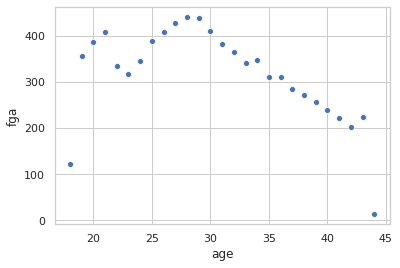

In [37]:
ax = sns.scatterplot(x="age", y="fga", data=age_fga)

<span style="color:navy;font-weight:bold">I see a negative relation between age and pts and fga. As older the player gets, less points he scores.<br>
I expect same negative relation between age and minutes played</span>

In [38]:
min_play = seasons_df.groupby(['age'],as_index=False)['mp'].mean()

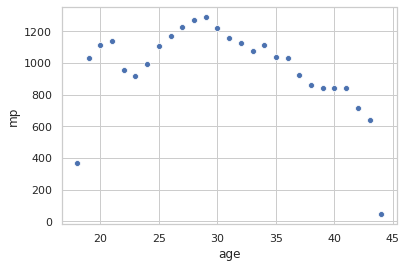

In [39]:
ax = sns.scatterplot(x="age", y="mp", data=min_play)

<span style="color:navy;font-weight:bold">Now I want to check distribution of points per game by age</span>

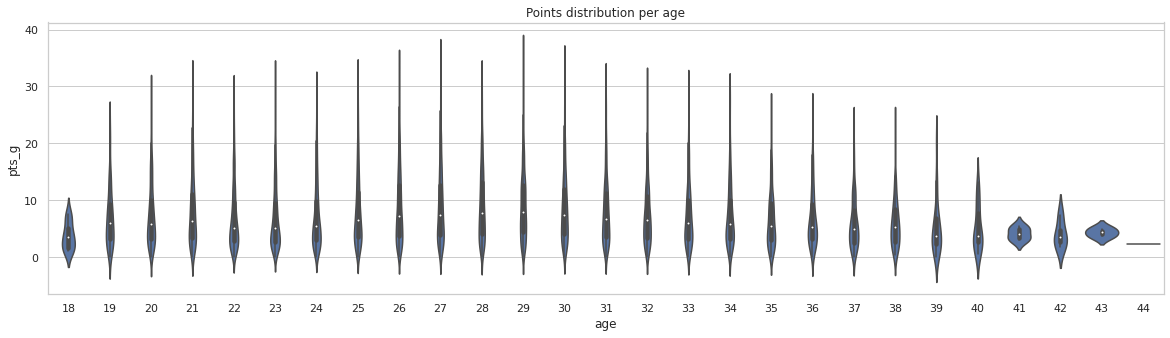

In [40]:
fig, ax = plt.subplots(figsize=(20,5))
base_color = sns.color_palette()[0]
ax = sns.violinplot(data = seasons_df, x = 'age', y = 'pts_g', color = base_color)
ax.set_title('Points distribution per age')

plt.show();

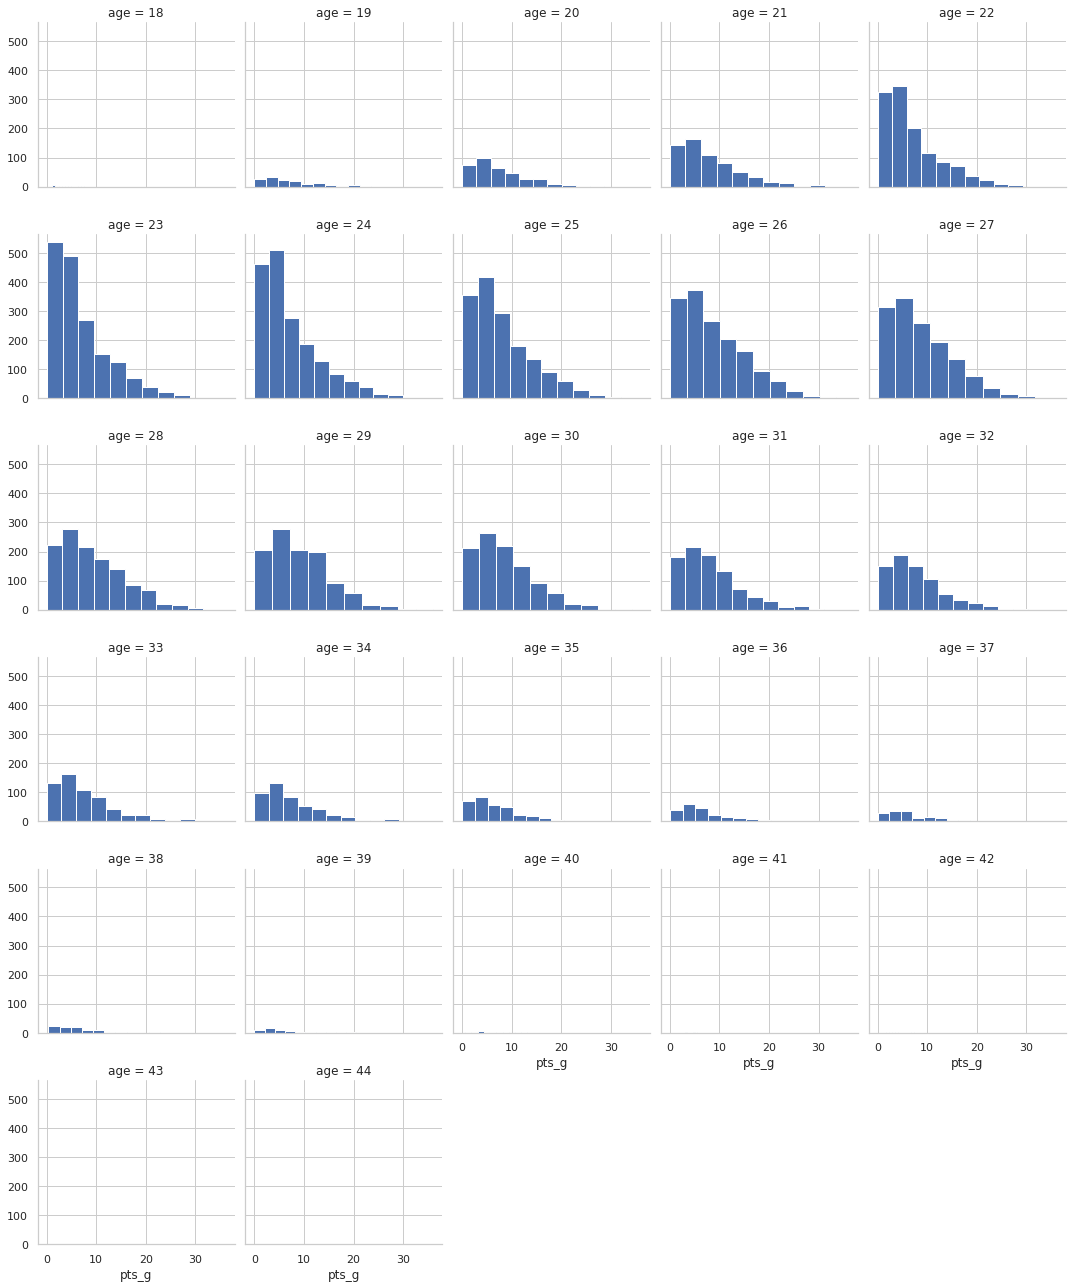

In [41]:
g = sns.FacetGrid(data = seasons_df, col = 'age' , col_wrap = 5, size = 3)
g.map(plt.hist, "pts_g");

<span style="color:navy;font-weight:bold">Violin plots and facegrid plots show that histograms for points per game by age are right-skewed. This is expected as majority of players scores the lowest points per game and just few players scores the highest points per game</span>

In [42]:
seasons_df[seasons_df.age == 44]

,name,url,height,weight,shoots,country,pos,age,team_id,g,...,ft_pct,efg,pts_g,height_m,american,country_code,country_alpha2,country_alpha3,country_name,country_flag_url
9172,Kevin Willis,/players/w/willike02.html,7.0,220,Right,us,PF,44,DAL,5,...,1.0,0.384615,2.4,2.13,Yes,US,US,USA,United States of America,//upload.wikimedia.org/wikipedia/en/thumb/a/a4...


<span style="color:navy;font-weight:bold">As an interesting fact, Kevin Willis is the oldest player in NBA in last 30 years. He retired in 2007 at age of 44. You can see his profile below: <br>
</span>

<a href="https://en.wikipedia.org/wiki/Kevin_Willis">Kevin Willis</a>

<span style="color:navy;font-weight:bold">Now I want to compare the 3-Points FGA with 2-Points FGA</span>

In [43]:
fga_s = seasons_df.groupby(['season'], as_index=False)['fg2a', 'fg3a'].sum()
fga_s.sort_values('season', inplace=True)

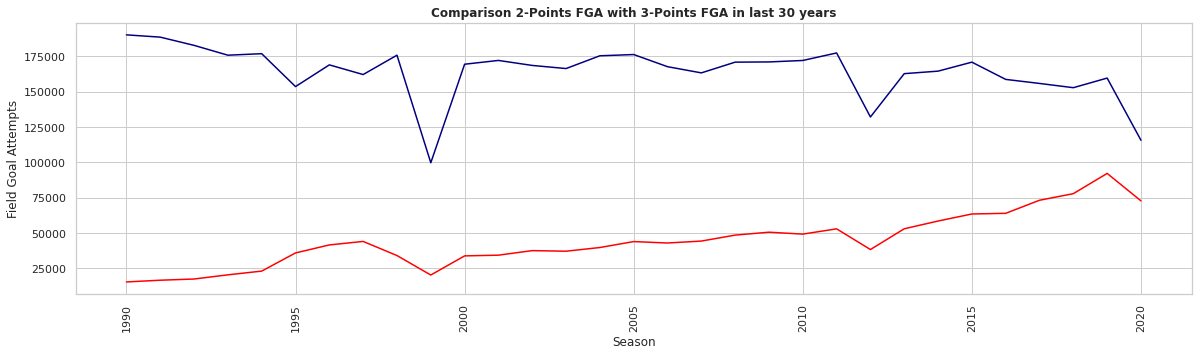

In [44]:
fig, ax = plt.subplots()
ax = sns.lineplot(x="season", y="fg2a", data=fga_s, color='navy')
ax2 = sns.lineplot(x="season", y="fg3a", data=fga_s, color='red')
ax.set(ylabel='Field Goal Attempts', xlabel='Season')
ax.set_title('Comparison 2-Points FGA with 3-Points FGA in last 30 years', fontsize='large', fontweight='bold')
plt.xticks(rotation=90)
fig.set_size_inches(20, 5)

font = FontProperties()
font.set_family('serif')
font.set_size(10)

for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.7, p.get_height()),
                    ha='center', va='bottom',  fontproperties=font,
                    color= 'black', rotation=45)
        
plt.show();



<span style="color:navy;font-weight:bold">I can see that players are attempting more 3-Point shoots today than 30 years ago. </span>

In [45]:
shoots_df = seasons_df.groupby(['season', 'shoots'], as_index=False)['pts_g'].mean()
shoots_df = shoots_df.query('shoots in ("Left", "Right")')


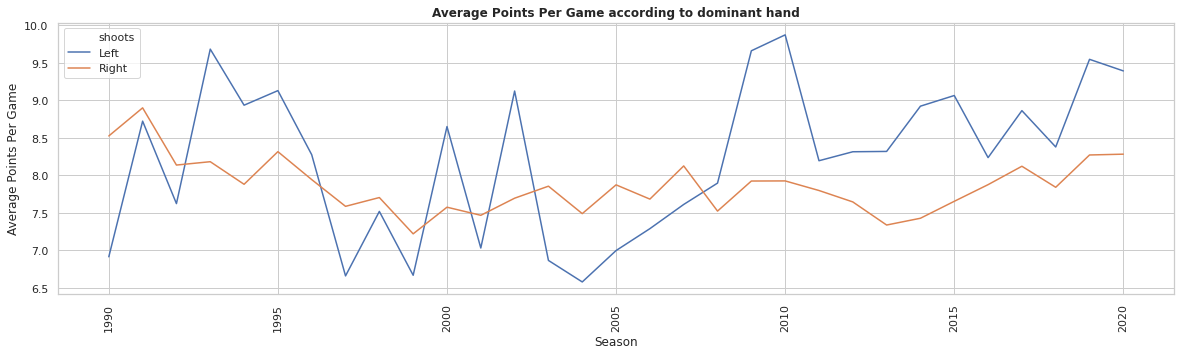

In [46]:
fig, ax = plt.subplots()
ax = sns.lineplot(x="season", y="pts_g", hue="shoots", data=shoots_df, color='navy')
ax.set(ylabel='Average Points Per Game', xlabel='Season')
ax.set_title('Average Points Per Game according to dominant hand', fontsize='large', fontweight='bold')
plt.xticks(rotation=90)
fig.set_size_inches(20, 5)
        
plt.show();



<span style="color:navy;font-weight:bold">I can see that left-handed players had higher PPG in average in last 15 years than right-handed players</span>

In [47]:
inter_df = seasons_df.groupby(['season', 'american'], as_index=False)['pts'].sum()
inter_df.sort_values(['season'],inplace=True)
inter_df.rename(columns={'american': 'nationality'}, inplace=True)

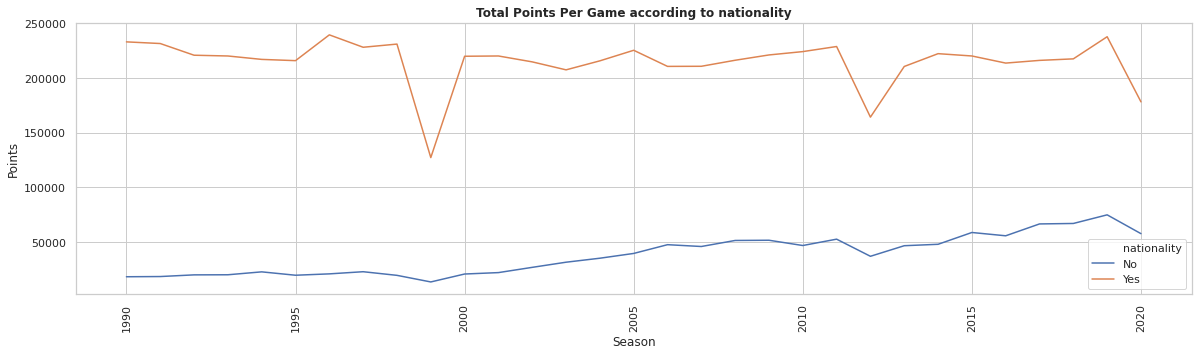

In [48]:
fig, ax = plt.subplots()
ax = sns.lineplot(x="season", y="pts", hue="nationality", data=inter_df, color='navy')
ax.set(ylabel='Points', xlabel='Season')
ax.set_title('Total Points Per Game according to nationality', fontsize='large', fontweight='bold')
plt.xticks(rotation=90)
fig.set_size_inches(20, 5)
        
plt.show();



In [49]:
inter_df = seasons_df.groupby(['season', 'american'], as_index=False)['mp'].sum()
inter_df.sort_values(['season'],inplace=True)
inter_df.rename(columns={'american': 'nationality'}, inplace=True)

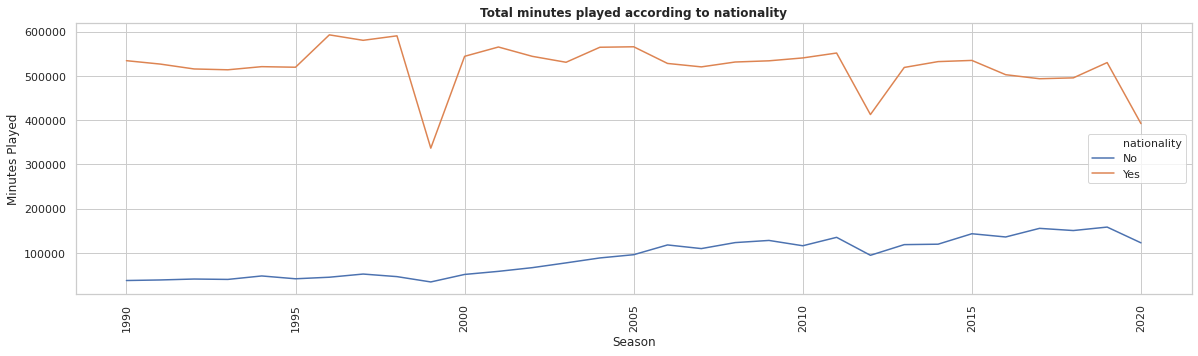

In [50]:
fig, ax = plt.subplots()
ax = sns.lineplot(x="season", y="mp", hue="nationality", data=inter_df, color='navy')
ax.set(ylabel='Minutes Played', xlabel='Season')
ax.set_title('Total minutes played according to nationality', fontsize='large', fontweight='bold')
plt.xticks(rotation=90)
fig.set_size_inches(20, 5)
        
plt.show();



<span style="color:navy;font-weight:bold">Here another fact. International players are getting more minutes per game in NBA. Consequently, they are producing more points per season</span>

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

<span style="color:navy;font-weight:bold">I´ve confirmed the importance of 3-Points attempts in NBA today as I predicted. The number of 3-Point attempts increased in last 30 years while the number of 2-Point attempts decreased. <br>
I also confirmed that age is an important factor for number of points per game. Oldest players have less minutes per game and consequently contribute with less points per season
</span>

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

<span style="color:navy;font-weight:bold">I observed that the number of non-American players in NBA has increased in last 30 years. Non-American players represented 7% in 1990. Currently they represent 24% of players.<br>
Non-American players are also having more minutes per game and contributing with more points per season
</span>

## Multivariate Exploration


<span style="color:navy;font-weight:bold">I'll start by checking how points are distributed</span>

In [51]:
point_distr = seasons_df.groupby(['season'],as_index=False)['fg2','fg3','ft'].sum()
point_distr['Free Throws'] = point_distr['ft'] 
point_distr['2-Point FG'] = point_distr['fg2'] * 2
point_distr['3-Point FG'] = point_distr['fg3'] * 3


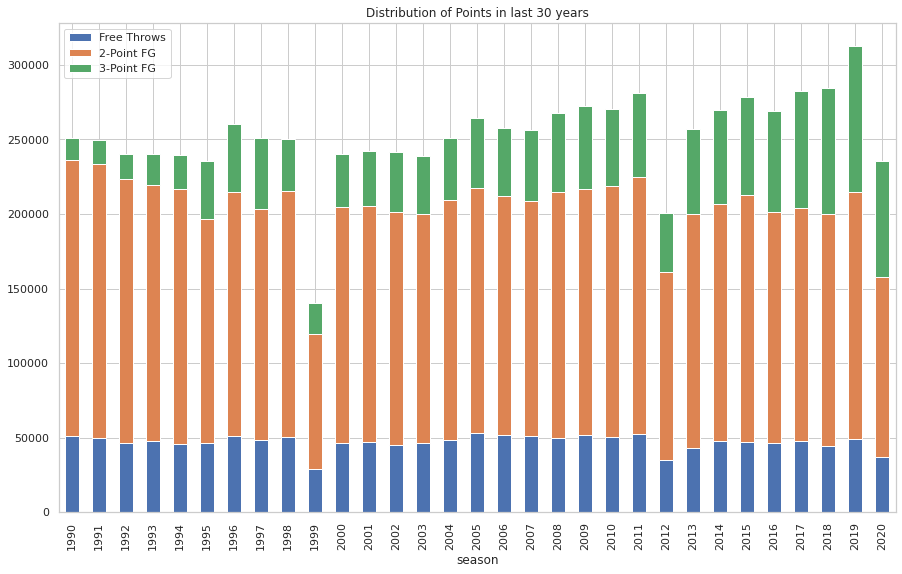

In [52]:
point_distr[['season','Free Throws', '2-Point FG', '3-Point FG']].plot.bar(stacked=True,x='season',figsize=(15,9), title='Distribution of Points in last 30 years')


<span style="color:navy;font-weight:bold">
Players from 83 different nationality has played in NBA in last 83 years. <br>I´ll mark them in worldmap and scale color according to number of players
</span>

In [53]:
countries = players.groupby(['country_name', 'country_alpha3'],as_index=False)['name'].count()
countries.columns = ['country', 'country_alpha3', 'total']
countries.sort_values(['total'],ascending=False,inplace=True)
countries.at[countries[countries['country'] == 'French Guiana'].index, 'country_alpha3'] = 'GUY'
countries.at[countries[countries['country'] == 'Guadeloupe'].index, ['country','country_alpha3']] = ['France','FRA']
countries.at[countries[countries['country'] == 'Martinique'].index, ['country','country_alpha3']] = ['France','FRA']
countries_sum = countries.groupby(['country', 'country_alpha3'],as_index=False)['total'].sum()
countries_gdf = geopandas.read_file("countries.geojson", layer='countries')
countries['pct'] = countries['total'].rank(method='dense', pct=True)


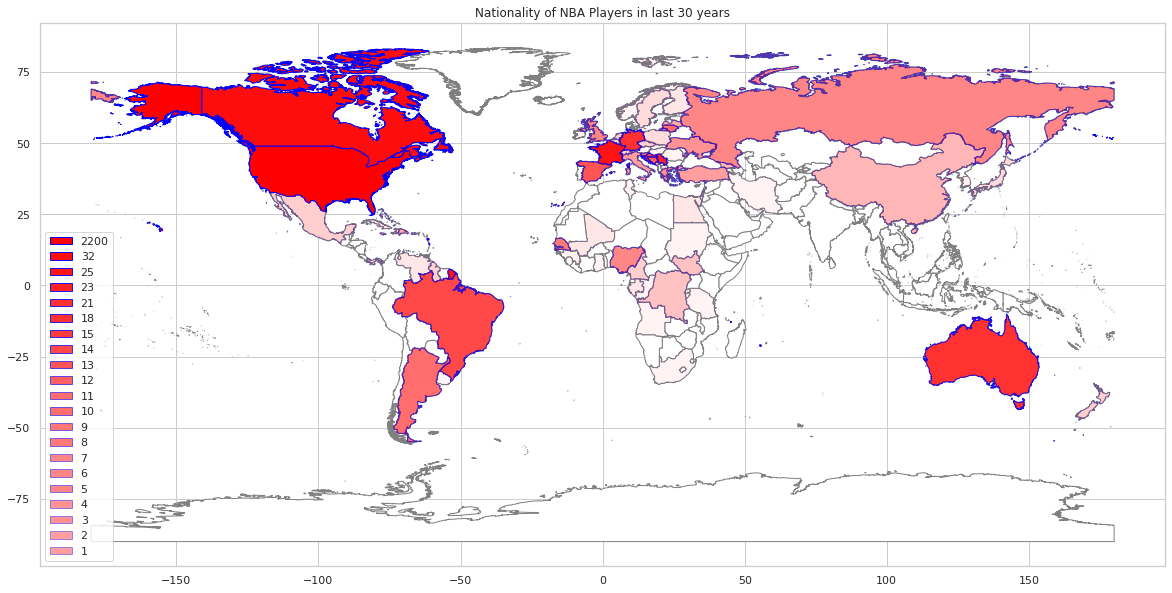

In [54]:
ax = countries_gdf.plot(figsize=(30,10), edgecolor=u'grey', facecolor='white', legend=True)

def plotCountryPatch( axes, iso_a3, fcolor, alpha ):
    # plot a country on the provided axes
    nami = countries_gdf[countries_gdf.ISO_A3 == iso_a3]
    namigm = nami.__geo_interface__['features']  # geopandas's geo_interface
    namig0 = {'type': namigm[0]['geometry']['type'], \
              'coordinates': namigm[0]['geometry']['coordinates']}
    axes.add_patch(PolygonPatch( namig0, fc=fcolor, ec="blue", alpha=alpha, zorder=2))

def rand_web_color_hex():
    rgb = ""
    for _ in "RGB":
        i = random.randrange(0, 2**8)
        rgb += i.to_bytes(1, "big").hex()
    return rgb
    
legend = []
for i,r in countries.iterrows():
    plotCountryPatch(ax, r.country_alpha3, 'red', r.pct)  
    if r.total not in legend:
        legend.append(r.total)

ax.autoscale_view()    
ax.set_title('Nationality of NBA Players in last 30 years')    
ax.legend(legend)

plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

<span style="color:navy;font-weight:bold">I extended my investigation about relevance of 3-point shootings in current NBA by distributing the points by Free-Throws, 2-Point FG and 3-Point FG</span>

### Were there any interesting or surprising interactions between features?

<span style="color:navy;font-weight:bold">Checking the plots, there were no surprises in the analysis. The number only confirmed my feelings as NBA fan</span>